In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


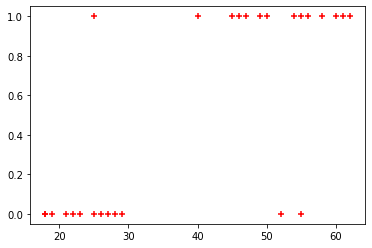

In [3]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,test_size=0.2, random_state=10)

In [6]:
X_test

,age
7,60
5,56
18,19
21,26
11,28
1,25


In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [8]:
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
X_test

,age
7,60
5,56
18,19
21,26
11,28
1,25


In [10]:
X_test.shape

(6, 1)

In [11]:
y_predicted = model.predict(X_test)

In [12]:
print(y_predicted)

[1 1 0 0 0 0]


In [13]:
model.predict_proba(X_test)

array([[0.07149888, 0.92850112],
       [0.10786116, 0.89213884],
       [0.88695589, 0.11304411],
       [0.78084024, 0.21915976],
       [0.73981614, 0.26018386],
       [0.79952814, 0.20047186]])

In [14]:
model.score(X_test,y_test)

1.0

In [15]:
y_predicted

array([1, 1, 0, 0, 0, 0], dtype=int64)

In [16]:
X_test

,age
7,60
5,56
18,19
21,26
11,28
1,25


In [17]:
model.coef_

array([[0.11277822]])

In [18]:
model.intercept_

array([-4.2028033])

In [19]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [20]:
def prediction_function(age):
    z = 0.11277822 * age - 4.2028033 
    print("Origical val", z)
    y = sigmoid(z)
    return y

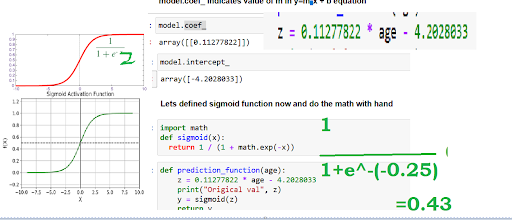

In [21]:
age = 35
prediction_function(age)

Origical val -0.25556560000000017


0.4364540926806563

In [22]:
age = 55
prediction_function(age)

Origical val 1.9999987999999993


0.8807969519855223

In [23]:
age = 40
prediction_function(age)

Origical val 0.3083254999999996


0.5764764821440581

In [24]:
# Get the order of classes
class_order = model.classes_
print("Class Order:", class_order)

Class Order: [0 1]


In [25]:
# Create a DataFrame with age values
ages = [47, 18, 12, 99, 86]
new_test = pd.DataFrame({'Age': ages})

# Apply the prediction_function to each age value
new_test['Prediction'] = new_test['Age'].apply(prediction_function)

# Print the DataFrame
print(new_test)

Origical val 1.0977730399999999
Origical val -2.1727953400000004
Origical val -2.84946466
Origical val 6.962240479999999
Origical val 5.49612362
   Age  Prediction
0   47    0.749843
1   18    0.102220
2   12    0.054709
3   99    0.999054
4   86    0.995914


In [26]:
labels = model.predict(new_test[['Age']])

# Print the labels
print(labels)

[1 0 0 1 1]


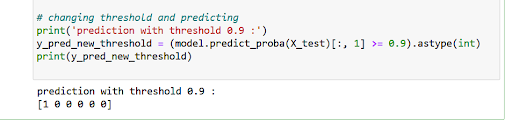